In [1]:
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.xception import Xception


from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

Using TensorFlow backend.


In [76]:
# from keras import applications

# datagens = ImageDataGenerator(rescale=1.0/255)
# model = applications.VGG16(include_top=False,input_shape=(100,100,3))

# load data

In [2]:
resize_pix = 224

In [3]:
train_directory = './train'
train_image_list = []

for class_name in os.listdir(train_directory):
    
    class_path = train_directory+'/'+class_name
    
    for img_name in os.listdir(class_path):
        if img_name.endswith(".jpg"):
            img_path = train_directory+'/'+class_name+'/'+img_name
            train_image_list.append([class_name,img_path])

In [4]:
test_directory = './test'

test_image_list = []

for test_img in os.listdir(test_directory):
    test_img_path = test_directory+'/'+test_img
    test_image_list.append([None,test_img_path,test_img[:-4]])

In [5]:
train_data = pd.DataFrame(train_image_list,columns=['class','path'])
test_data = pd.DataFrame(test_image_list,columns=['class','path','test_img'])

In [6]:
class_mapping = {
'daisy':0,
'dandelion':1,
'rose':2,
'sunflower':3,
'tulip':4
}

In [7]:
train_data['class'] = train_data['class'].map(class_mapping)

In [8]:
train_data.head()

,class,path
0,2,./train/rose/5578760521_e54aca6bed_n.jpg
1,2,./train/rose/14970973709_968910640e_n.jpg
2,2,./train/rose/6280787884_141cd7b382_n.jpg
3,2,./train/rose/7820626638_3e2d712303.jpg
4,2,./train/rose/33185001420_dc8f571c4f_n.jpg


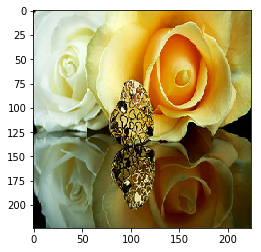

In [10]:
# img = cv2.imread('./train/tallbuilding/image_0069.jpg', 1)
# img = cv2.resize(img,(resize_pix,resize_pix))

img = image.load_img('./train/rose/5578760521_e54aca6bed_n.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)

In [11]:
img_loc = train_data['path'].values

In [12]:
img_arr = []
for loc in img_loc:
    
#     img = cv2.imread(loc, 1)
#     img = cv2.resize(img,(resize_pix,resize_pix))
#     img_arr.append(img)

    img = image.load_img(loc,target_size=(resize_pix,resize_pix))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_arr.append(x)


In [13]:
img_arr = np.array(img_arr)

In [14]:
img_arr = img_arr.reshape(img_arr.shape[0],resize_pix,resize_pix,3)

In [15]:
img_arr.shape

(3823, 224, 224, 3)

In [16]:
y_train = train_data['class']

In [17]:
X_train_all = np.array(img_arr)
y_train_all = np.eye(5)[y_train.values]

In [20]:

split_idx = X_train_all.shape[0]

In [21]:
test_img_loc = test_data['path'].values
test_img_arr = []
for loc in test_img_loc:
    
#     img = cv2.imread(loc, 1)
#     img = cv2.resize(img,(resize_pix,resize_pix))
#     test_img_arr.append(img)
    img = image.load_img(loc,target_size=(resize_pix,resize_pix))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    test_img_arr.append(x)

    
    
test_img_arr = np.array(test_img_arr)
test_img_arr = test_img_arr.reshape(test_img_arr.shape[0],resize_pix,resize_pix,3)

In [22]:
test_img_arr.shape

(500, 224, 224, 3)

In [23]:
all_data = np.concatenate((X_train_all, test_img_arr), axis=0)

In [22]:
# test_img_arr

In [23]:
#z-score

# all_data = all_data.astype('float32')
# mean = np.mean(all_data,axis=(0,1,2,3))
# std = np.std(all_data,axis=(0,1,2,3))
# all_data = (all_data-mean)/(std+1e-7)

In [24]:
X_train_all.shape

(3823, 224, 224, 3)

In [25]:
X_train_all = all_data[:split_idx]

In [26]:
test_img_arr = all_data[split_idx:]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X_train_all,y_train_all,test_size=0.2,random_state=43,stratify=y_train_all)

# x_train2,x_test2,y_train2,y_test2 = train_test_split(X_train_all,y_train_all,test_size=0.15,random_state=9,stratify=y_train_all)

# x_train3,x_test3,y_train3,y_test3 = train_test_split(X_train_all,y_train_all,test_size=0.15,random_state=17,stratify=y_train_all)

In [28]:
baseMapNum = 32
weight_decay = 1e-4
num_classes = 15
batch_size = 64
epochs = 150

In [29]:
len(train_data['path'])

2945

In [30]:
len(y_train_all)

2945

In [29]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import numpy as np


In [57]:
# model_res = ResNet50(include_top=False,weights='imagenet',input_shape=[224,224,3])
# model_res.summary()

In [58]:
# res_model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

# for layer in res_model.layers:
#     layer.trainable = False
# model = Flatten()(res_model.output)

# model = Dense(15,activation='softmax')(model)
# model = Model(res_model.input,model,name='pretrain')


In [59]:

## great work . public :92% for 100 epoch

# res_model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))
    
# for layer in res_model.layers[-6:]:
#     layer.trainable=False

# model = Flatten()(res_model.output)

# model = Dense(1024,activation='relu')(model)
# model = Dense(15,activation='softmax')(model)
# model = Model(res_model.input,model,name='pretrain')
    

In [33]:
res_model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))
    
for layer in res_model.layers[-8:]:
    layer.trainable=False

model = Flatten()(res_model.output)

model = Dense(1024,activation='relu')(model)
model = Dense(5,activation='softmax')(model)
model = Model(res_model.input,model,name='pretrain')




In [88]:
# res_model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))
    
# for layer in res_model.layers:
#     layer.trainable=False


# model = Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:])(res_model.output)
# model = Activation('relu')(model)
# model = BatchNormalization()(model)
# model = Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(model)
# model = Activation('relu')(model)
# model = BatchNormalization()(model)
# # model = MaxPooling2D(pool_size=(2,2))(model)
# model = Dropout(0.2)(model)


# model = Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:])(res_model.output)
# model = Activation('relu')(model)
# model = BatchNormalization()(model)
# model = Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(model)
# model = Activation('relu')(model)
# model = BatchNormalization()(model)
# # model = MaxPooling2D(pool_size=(2,2))(model)
# model = Dropout(0.3)(model)

# model = Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:])(res_model.output)
# model = Activation('relu')(model)
# model = BatchNormalization()(model)
# model = Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))(model)
# model = Activation('relu')(model)
# model = BatchNormalization()(model)
# # model = MaxPooling2D(pool_size=(2,2))(model)
# model = Dropout(0.4)(model)

# model = Flatten()(res_model.output)
# # model = Dense(1024,activation='relu')(model)
# model = Dense(15,activation='softmax')(model)



# model = Model(res_model.input,model,name='pretrain')

In [89]:
# vgg16_model = VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))
# vgg16_model.layers.pop()
# for layer in vgg16_model.layers[-9:]:
#     layer.trainable = False

# model = Flatten()(vgg16_model.output)


# # model = Dense(1024,activation='relu')(model)
# model = Dense(15,activation='softmax')(model)
# model = Model(vgg16_model.input,model,name='pretrain')


In [90]:

# model.add(Dense(15,activation='softmax'))

In [91]:
len(res_model.layers)

174

In [34]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [35]:
#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(x_train)

#training

opt_adam = keras.optimizers.Adam(lr=0.00001,decay=1e-5)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_adam,
        metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
model.save('cifar10_normal_rms_ep75.h5')


# opt_rms = keras.optimizers.rmsprop(lr=0.0005,decay=1e-6)
# model.compile(loss='categorical_crossentropy',
#         optimizer=opt_rms,
#         metrics=['accuracy'])
# model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
# model.save_weights('cifar10_normal_rms_ep130.h5')



#testing - no kaggle eval
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

Epoch 1/150
47/47 [==============================] - 33s 701ms/step - loss: 1.2317 - acc: 0.5352 - val_loss: 0.7829 - val_acc: 0.7647
Epoch 2/150
47/47 [==============================] - 25s 527ms/step - loss: 0.6378 - acc: 0.8069 - val_loss: 0.4910 - val_acc: 0.8484
Epoch 3/150
47/47 [==============================] - 25s 534ms/step - loss: 0.4300 - acc: 0.8777 - val_loss: 0.3892 - val_acc: 0.8771
Epoch 4/150
47/47 [==============================] - 25s 531ms/step - loss: 0.3192 - acc: 0.9104 - val_loss: 0.3347 - val_acc: 0.8889
Epoch 5/150
47/47 [==============================] - 25s 539ms/step - loss: 0.2653 - acc: 0.9202 - val_loss: 0.3109 - val_acc: 0.8954
Epoch 6/150
47/47 [==============================] - 26s 543ms/step - loss: 0.2100 - acc: 0.9364 - val_loss: 0.2972 - val_acc: 0.8915
Epoch 7/150
47/47 [==============================] - 25s 535ms/step - loss: 0.1695 - acc: 0.9512 - val_loss: 0.2891 - val_acc: 0.8980
Epoch 8/150
47/47 [==============================] - 25s 540ms

Epoch 62/150
47/47 [==============================] - 25s 533ms/step - loss: 0.0048 - acc: 0.9987 - val_loss: 0.3258 - val_acc: 0.9294
Epoch 63/150
47/47 [==============================] - 25s 539ms/step - loss: 0.0033 - acc: 0.9990 - val_loss: 0.3216 - val_acc: 0.9294
Epoch 64/150
47/47 [==============================] - 25s 537ms/step - loss: 0.0035 - acc: 0.9983 - val_loss: 0.3225 - val_acc: 0.9242
Epoch 65/150
47/47 [==============================] - 25s 533ms/step - loss: 0.0040 - acc: 0.9983 - val_loss: 0.3424 - val_acc: 0.9281
Epoch 66/150
47/47 [==============================] - 25s 531ms/step - loss: 0.0050 - acc: 0.9980 - val_loss: 0.3480 - val_acc: 0.9190
Epoch 67/150
47/47 [==============================] - 25s 530ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3453 - val_acc: 0.9190
Epoch 68/150
47/47 [==============================] - 25s 533ms/step - loss: 0.0037 - acc: 0.9990 - val_loss: 0.3581 - val_acc: 0.9203
Epoch 69/150
47/47 [==============================] - 2

47/47 [==============================] - 25s 525ms/step - loss: 8.3952e-04 - acc: 0.9997 - val_loss: 0.3731 - val_acc: 0.9359
Epoch 123/150
47/47 [==============================] - 25s 526ms/step - loss: 0.0014 - acc: 0.9990 - val_loss: 0.3701 - val_acc: 0.9346
Epoch 124/150
47/47 [==============================] - 25s 531ms/step - loss: 0.0011 - acc: 0.9993 - val_loss: 0.3648 - val_acc: 0.9373
Epoch 125/150
47/47 [==============================] - 25s 527ms/step - loss: 0.0017 - acc: 0.9990 - val_loss: 0.3661 - val_acc: 0.9346
Epoch 126/150
47/47 [==============================] - 25s 528ms/step - loss: 0.0021 - acc: 0.9990 - val_loss: 0.4037 - val_acc: 0.9255
Epoch 127/150
47/47 [==============================] - 25s 532ms/step - loss: 0.0044 - acc: 0.9980 - val_loss: 0.3819 - val_acc: 0.9294
Epoch 128/150
47/47 [==============================] - 25s 541ms/step - loss: 0.0021 - acc: 0.9990 - val_loss: 0.3942 - val_acc: 0.9294
Epoch 129/150
47/47 [==============================] - 25s

In [307]:
# sub.head()

In [308]:
# test_data.head()

In [309]:
# ans

In [36]:
ans = model.predict(test_img_arr)

In [37]:
ans = np.argmax(ans,axis=1)

In [38]:
test_data['class'] = ans

In [39]:
sub = pd.read_csv('./submission.csv')

In [40]:
mapping = {}

for i in range(len(sub)):
    val = sub.iloc[i]['id']
    mapping[val]=i

In [41]:
test_data['order'] = test_data['test_img'].map(mapping)

In [42]:
test_data = test_data.sort_values(by='order')

In [43]:
test_data.reset_index(drop=True,inplace=True)

In [44]:
sub['class'] = test_data['class'].values

In [47]:
sub.to_csv('./ans.csv',index=False)

In [46]:
sub.head(20)

,id,class
0,100080576_f52e8ee070_n,0
1,1008566138_6927679c8a,3
2,100930342_92e8746431_n,4
3,1022552002_2b93faf9e7_n,3
4,1022552036_67d33d5bd8_n,3
5,102501987_3cdb8e5394_n,2
6,102841525_bd6628ae3c,0
7,1031799732_e7f4008c03,0
8,1043442695_4556c4c13d_n,3
9,1044296388_912143e1d4,3


In [ ]:
# from sklearn.utils import shuffle 

# def simpson_train_batch_generator(x, y, bs, shape):
#     x_train = np.array([]).reshape((0, shape))
#     y_train = np.array([]).reshape((0, y.shape[1]))
#     while True:
#         new_ind = shuffle(range(len(x)))
#         x = x.take(new_ind)
#         y = np.take(y, new_ind, axis=0)
#         for i in range(len(x)):
            
            
#             dir_img = X_train.iloc[i]
            
#             img = cv2.imread(dir_img, 0)
#             img = cv2.resize(img, img_resize)
#             x_train = np.row_stack([x_train, img.flatten()])
#             y_train = np.row_stack([y_train, y[i]])
#             if x_train.shape[0] == bs:
#                 x_batch = x_train.copy()
#                 x_batch /= 255.
#                 y_batch = y_train.copy()
#                 x_train = np.array([]).reshape((0 ,shape))
#                 y_train = np.array([]).reshape((0 ,y.shape[1]))        
#                 yield x_batch, y_batch

# def simpson_test_batch_generator(x, shape):
#     x_test = np.array([]).reshape((0, shape))
#     for i in range(len(x)):
#         dir_img = X_validate.iloc[i]
#         img = cv2.imread(dir_img, 0)
#         img = cv2.resize(img, img_resize)
#         x_test = np.row_stack([x_test, img.flatten()])
#     x_test /= 255.      
#     return x_test

# x_test = simpson_test_batch_generator(X_validate, flatten_len)